In [1]:
import os
import glob
from pathlib import Path
import numpy as np
import pandas as pd
import shutil
import sys
sys.path.append("./mld/src")
import midlevel_descriptors as mld

In [2]:
in_directory = './Annotations/'

In [ ]:
# copy all wav files to one directory
wav_sources = 'processed/'
wav_target = 'all_wavs'
for file in Path(wav_sources).rglob('*.wav'):
    if os.path.isfile(file):
        shutil.copy2(file, wav_target)

In [ ]:
# Fix pandas error with Orschulik df
df_q = pd.read_pickle('./processed/Orschulik/Orschulik_mdf.pkl')
def re_arrange_df(df, audio_dir):
    df['segmented_file'] = df['segmented_file'].apply(lambda x: audio_dir+os.path.basename(x))
    df = df.set_index(df.segmented_file)
    df = df.drop(columns=['segmented_file', 'channel'])
    return df
df_q = re_arrange_df(df_q, 'all_wavs/')

ad ={'id':'Q-Stimme', 
     'gender': 'divers', 
     'speakertype': 'synthetic',
     'age': 35, 
     'lang':'en-GB', 
     'speechtype':'synthetic',
     'source':'https://www.genderlessvoice.com/'}
for k in ad:
    df_q[k] = ad[k]
df_q.to_pickle('Annotations/q.pkl')

df_q.head()

In [ ]:
# Fix file path with Wannenmacher df
df_wannenmacher = pd.read_pickle('./Annotations/Apt.pkl')
df_wannenmacher.head()
df_wannenmacher.index = df_wannenmacher.index.to_series().apply(lambda x: x[3:])
df_wannenmacher.to_pickle('./Annotations/Apt.pkl')

./Annotations/alexa.pkl
./Annotations/amthor.pkl
./Annotations/Apt.pkl
./Annotations/bartsch.pkl
./Annotations/Drosten.pkl
./Annotations/geliebte_anno.pkl
./Annotations/king.pkl
./Annotations/obama.pkl
./Annotations/q.pkl
./Annotations/schumacher.pkl
./Annotations/thunberg.pkl


In [4]:
df.id.unique()

array(['alexa', 'philipp.amthor', 'Daniel_Apt', 'dietmar_bartsch',
       'Drosten', 'hildegard_knef', 'martin_luther_king',
       'michelle_obama', 'Q-Stimme', 'hajo_schumacher', 'greta_thunberg'],
      dtype=object)

In [ ]:
import IPython
IPython.display.Audio("./all_wavs//Q-Stimme_Orschulik_seg_00000000.wav")

In [5]:
import IPython
IPython.display.Audio('all_wavs/Die-Geliebte_Haubereiser_seg_00000039.wav')

In [6]:
df.head(1)

,id,age,speechtype,lang,source,speakertype,gender
segmented_file,,,,,,,
all_wavs/Alexa_Seyfried_seg_00000000.wav,alexa,30,synthetic,de,https://play.google.com/store/apps/details?id=...,synthetic,female


In [7]:
df.gender.unique()

array(['female', 'male', 'divers'], dtype=object)

### Feature extraction
here the mid level descriptor features are extracted from the dataframe index (containing the audio file path)

In [8]:
fex_mld = mld.MLD()
mld_df = fex_mld.extract_from_index(index=df, cache_path='./tmp/alldf_mld_cache/cache')

In [16]:
df.shape

(794, 7)

<AxesSubplot:ylabel='speechtype'>

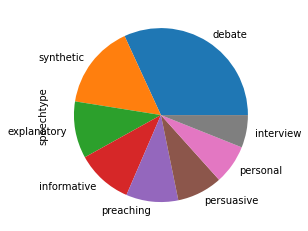

In [9]:
df.speechtype.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='speakertype'>

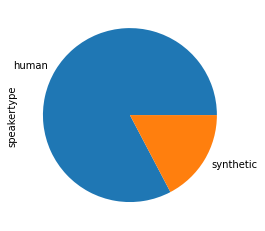

In [10]:
df.speakertype.value_counts().plot(kind='pie')

In [15]:
df_preach = df[df.speechtype=='preaching']
df_debate = df[df.speechtype=='debate']

In [12]:
def get_feats(df):
    return mld_df[mld_df.index.isin(df.index)]
feats_preach = get_feats(df_preach)
feats_debate = get_feats(df_debate)

In [ ]:
feats_preach.shape

<AxesSubplot:>

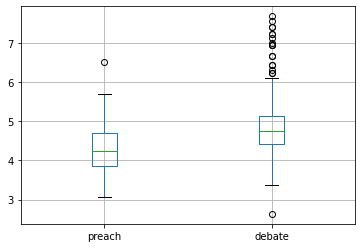

In [13]:
pd.concat([feats_preach['hld_sylRate'].rename('preach'), 
           feats_debate['hld_sylRate'].rename('debate')], axis=1).boxplot()